# KLASTEROVANJE

In [74]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

## 8) Identifikovati i karakterisati ekstremne vrednosti (outlier-e)

In [75]:
df = pd.read_csv('Bank Marketing/prepared_bank.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3815 non-null   int64  
 1   job             3815 non-null   int64  
 2   education       3815 non-null   int64  
 3   housing         3815 non-null   bool   
 4   loan            3815 non-null   bool   
 5   winter          3815 non-null   int64  
 6   spring          3815 non-null   int64  
 7   summer          3815 non-null   int64  
 8   autumn          3815 non-null   int64  
 9   cellular        3815 non-null   int64  
 10  telephone       3815 non-null   int64  
 11  anxiety         3815 non-null   int64  
 12  duration        3815 non-null   float64
 13  campaign        3815 non-null   float64
 14  pdays           3815 non-null   bool   
 15  previous        3815 non-null   bool   
 16  emp_var_rate    3815 non-null   float64
 17  cons_price_idx  3815 non-null   f

In [77]:
df=df.dropna()

Sledeci korak je da normalizujemo podatke. Koristicemo MaxMin metriku.

In [78]:
from sklearn.preprocessing import MinMaxScaler

Pre same normalizacije, prvo cemo promeniti kolone ciji je tip bool u kolone ciji je tip int64 (False = 0; True = 1)

In [79]:
df['housing'] = df['housing'].astype('int64')
df['loan'] = df['loan'].astype('int64')
df['pdays'] = df['pdays'].astype('int64')
df['previous'] = df['previous'].astype('int64')
df['subscribed?'] = df['subscribed?'].astype('int64')

In [80]:
df.dtypes

age                 int64
job                 int64
education           int64
housing             int64
loan                int64
winter              int64
spring              int64
summer              int64
autumn              int64
cellular            int64
telephone           int64
anxiety             int64
duration          float64
campaign          float64
pdays               int64
previous            int64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
nr_employed       float64
euribor3m         float64
divorced            int64
married             int64
single              int64
subscribed?         int64
dtype: object

In [81]:
scaler = MinMaxScaler() # inicijalizacija metrike; podrazumevani opseg [0,1]
scaler.fit(df)
df_norm = scaler.transform(df)

Sada pretvaramo ndarray u pandas i dodeljujemo mu nazive kolona.

In [82]:
df_norm = pd.DataFrame(df_norm)
df_norm.columns = df.columns

In [83]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3814 non-null   float64
 1   job             3814 non-null   float64
 2   education       3814 non-null   float64
 3   housing         3814 non-null   float64
 4   loan            3814 non-null   float64
 5   winter          3814 non-null   float64
 6   spring          3814 non-null   float64
 7   summer          3814 non-null   float64
 8   autumn          3814 non-null   float64
 9   cellular        3814 non-null   float64
 10  telephone       3814 non-null   float64
 11  anxiety         3814 non-null   float64
 12  duration        3814 non-null   float64
 13  campaign        3814 non-null   float64
 14  pdays           3814 non-null   float64
 15  previous        3814 non-null   float64
 16  emp_var_rate    3814 non-null   float64
 17  cons_price_idx  3814 non-null   f

In [84]:
df_norm

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,subscribed?
0,0.159420,0.0,0.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.132729,0.029412,0.0,0.0,0.333333,0.269680,0.192469,0.512287,0.153741,0.0,1.0,0.0,0.0
1,0.289855,0.5,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00,0.093982,0.088235,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,0.0,0.0,1.0,0.0
2,0.086957,0.5,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.061281,0.000000,0.0,0.0,1.000000,0.882307,0.376569,1.000000,0.981179,0.0,1.0,0.0,0.0
3,0.405797,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.014839,0.000000,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,1.0,0.0,0.0
4,0.188406,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.034075,0.058824,0.0,1.0,0.479167,0.778644,0.556485,0.000000,0.056463,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0.159420,1.0,0.2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.013465,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980272,0.0,1.0,0.0,0.0
3810,0.289855,1.0,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.00,0.059082,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980499,0.0,1.0,0.0,0.0
3811,0.115942,0.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.016488,0.029412,0.0,1.0,0.333333,0.269680,0.192469,0.512287,0.163039,0.0,0.0,1.0,0.0
3812,0.565217,1.0,0.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.143996,0.000000,0.0,0.0,1.000000,0.484412,0.615063,1.000000,0.982086,0.0,1.0,0.0,0.0


In [85]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df_norm

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,subscribed?
0,0.159420,0.0,0.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.132729,0.029412,0.0,0.0,0.333333,0.269680,0.192469,0.512287,0.153741,0.0,1.0,0.0,0.0
1,0.289855,0.5,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00,0.093982,0.088235,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,0.0,0.0,1.0,0.0
2,0.086957,0.5,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.061281,0.000000,0.0,0.0,1.000000,0.882307,0.376569,1.000000,0.981179,0.0,1.0,0.0,0.0
3,0.405797,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.014839,0.000000,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,1.0,0.0,0.0
4,0.188406,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.034075,0.058824,0.0,1.0,0.479167,0.778644,0.556485,0.000000,0.056463,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0.159420,1.0,0.2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.013465,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980272,0.0,1.0,0.0,0.0
3810,0.289855,1.0,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.00,0.059082,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980499,0.0,1.0,0.0,0.0
3811,0.115942,0.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.016488,0.029412,0.0,1.0,0.333333,0.269680,0.192469,0.512287,0.163039,0.0,0.0,1.0,0.0
3812,0.565217,1.0,0.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.143996,0.000000,0.0,0.0,1.000000,0.484412,0.615063,1.000000,0.982086,0.0,1.0,0.0,0.0


In [86]:
import matplotlib.pyplot as plt

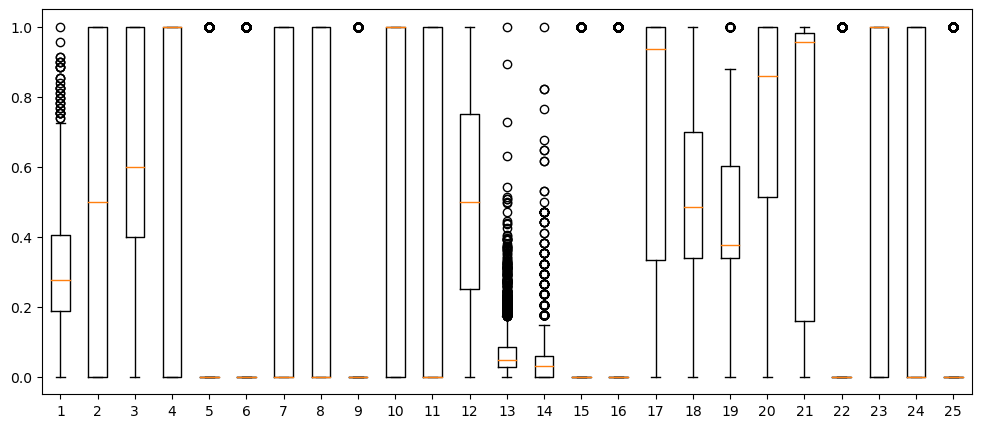

In [87]:
plt.boxplot(df_norm)
plt.show()

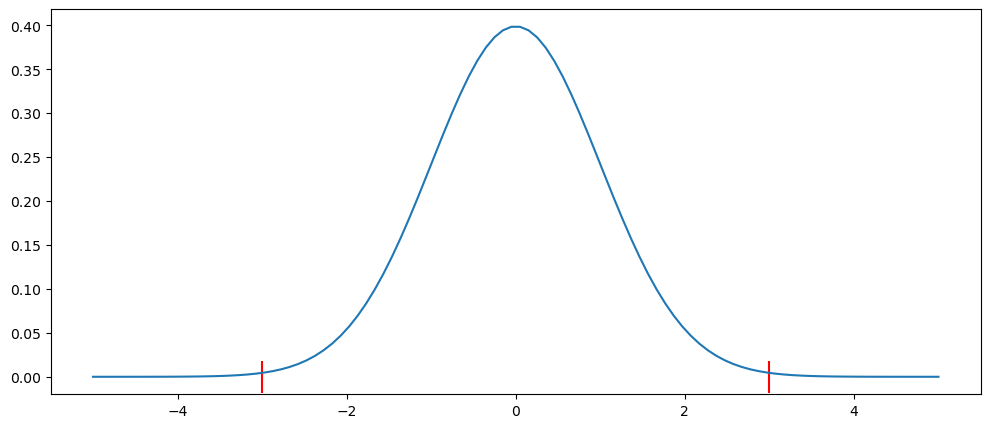

In [88]:
import math
import scipy.stats as stats

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.scatter([3*sigma,-3*sigma], [0,0], c = 'r', marker = '|', s = 500)
plt.show()

In [89]:
!pip install pydataset

Defaulting to user installation because normal site-packages is not writeable


Racunamo zscore za svaku instancu po svakom atributu (standardna devijacija za svaku instancu u odnosu na odgovarajuci atribut)

In [90]:
z = np.abs(stats.zscore(df_norm.drop('subscribed?', axis=1)))
z

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single
0,0.974817,1.257946,0.731767,0.915463,0.446510,0.363899,1.232540,0.912564,0.181010,0.735957,0.735957,1.445539,0.895568,0.207111,0.198083,0.408748,1.212779,1.180224,1.225884,0.928576,1.339364,0.350365,0.796307,0.621615
1,0.094273,0.056993,0.126221,1.092344,0.446510,0.363899,1.232540,0.912564,0.181010,1.358775,1.358775,1.445539,0.346476,0.564673,0.198083,0.408748,0.650375,0.724587,0.905253,0.327841,0.711880,0.350365,1.255797,1.608713
2,1.464009,0.056993,0.126221,0.915463,0.446510,0.363899,0.811333,1.095814,0.181010,1.358775,1.358775,0.028788,0.116942,0.593003,0.198083,0.408748,0.843115,1.539452,0.269047,0.835056,0.773846,0.350365,0.796307,0.621615
3,0.688434,1.143959,1.084870,0.915463,0.446510,2.748012,0.811333,0.912564,0.181010,0.735957,0.735957,1.387963,0.775074,0.593003,0.198083,0.408748,0.120585,0.649091,0.312539,0.393464,0.327344,0.350365,0.796307,0.621615
4,0.779141,0.056993,1.084870,1.092344,0.446510,0.363899,0.811333,0.912564,5.524551,0.735957,0.735957,0.737164,0.502475,0.178781,0.198083,2.446497,0.763052,1.079252,0.666044,2.781073,1.587806,0.350365,1.255797,1.608713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0.974817,1.143959,1.337312,0.915463,2.239592,0.363899,0.811333,1.095814,0.181010,0.735957,0.735957,0.737164,0.794545,0.593003,0.198083,0.408748,0.843115,0.593102,0.464763,0.835056,0.771529,0.350365,0.796307,0.621615
3810,0.094273,1.143959,0.126221,0.915463,0.446510,0.363899,0.811333,1.095814,0.181010,1.358775,1.358775,1.445539,0.148097,0.593003,0.198083,0.408748,0.843115,0.593102,0.464763,0.835056,0.772108,0.350365,0.796307,0.621615
3811,1.268332,1.257946,0.126221,1.092344,0.446510,0.363899,1.232540,0.912564,0.181010,0.735957,0.735957,1.387963,0.751708,0.207111,0.198083,2.446497,1.212779,1.180224,1.225884,0.928576,1.315620,0.350365,1.255797,1.608713
3812,1.764655,1.143959,0.126221,1.092344,0.446510,0.363899,0.811333,1.095814,0.181010,0.735957,0.735957,1.445539,1.055233,0.593003,0.198083,0.408748,0.843115,0.226953,0.970492,0.835056,0.776162,0.350365,0.796307,0.621615


In [91]:
np.where(z>3)

(array([   4,    5,   20,   37,   48,   48,   51,   54,   55,   61,   61,
          72,   76,  117,  128,  131,  137,  137,  137,  140,  147,  150,
         150,  152,  169,  174,  185,  186,  208,  208,  227,  236,  236,
         262,  266,  290,  297,  308,  310,  314,  348,  369,  382,  386,
         400,  406,  407,  409,  421,  435,  445,  473,  477,  482,  482,
         495,  500,  513,  523,  544,  548,  557,  577,  594,  607,  608,
         608,  619,  621,  628,  628,  637,  645,  646,  652,  664,  665,
         667,  672,  681,  684,  694,  700,  722,  748,  750,  754,  759,
         771,  775,  805,  810,  820,  821,  827,  827,  831,  849,  860,
         867,  876,  876,  882,  888,  903,  906,  912,  929,  940,  952,
         958,  969,  978,  990,  990,  998, 1000, 1005, 1015, 1016, 1023,
        1023, 1074, 1079, 1079, 1102, 1103, 1106, 1118, 1139, 1139, 1139,
        1142, 1142, 1145, 1152, 1178, 1182, 1184, 1184, 1188, 1188, 1194,
        1202, 1219, 1228, 1228, 1234, 

Sada cemo da izbacimo instance kod kojih postoje odredjeni outlajeri.

In [92]:
x1 = np.where(z>3)[0]
x2 = set(list(x1))
df_norm = df_norm.drop(index = list(x2))

In [93]:
df_norm

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,subscribed?
0,0.159420,0.0,0.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.132729,0.029412,0.0,0.0,0.333333,0.269680,0.192469,0.512287,0.153741,0.0,1.0,0.0,0.0
1,0.289855,0.5,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00,0.093982,0.088235,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,0.0,0.0,1.0,0.0
2,0.086957,0.5,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.061281,0.000000,0.0,0.0,1.000000,0.882307,0.376569,1.000000,0.981179,0.0,1.0,0.0,0.0
3,0.405797,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.014839,0.000000,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,1.0,0.0,0.0
6,0.318841,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.010992,0.029412,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0.159420,1.0,0.2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.013465,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980272,0.0,1.0,0.0,0.0
3810,0.289855,1.0,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.00,0.059082,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980499,0.0,1.0,0.0,0.0
3811,0.115942,0.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.016488,0.029412,0.0,1.0,0.333333,0.269680,0.192469,0.512287,0.163039,0.0,0.0,1.0,0.0
3812,0.565217,1.0,0.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.143996,0.000000,0.0,0.0,1.000000,0.484412,0.615063,1.000000,0.982086,0.0,1.0,0.0,0.0


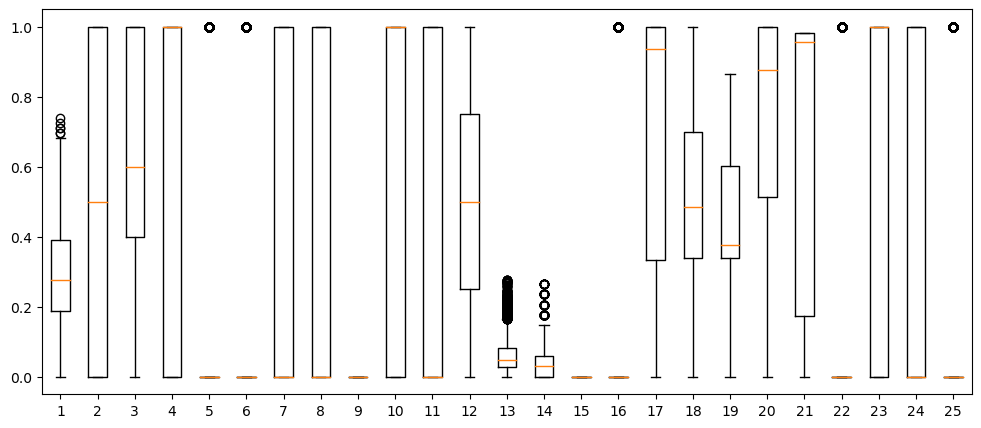

In [94]:
plt.boxplot(df_norm)
plt.show()

<AxesSubplot:>

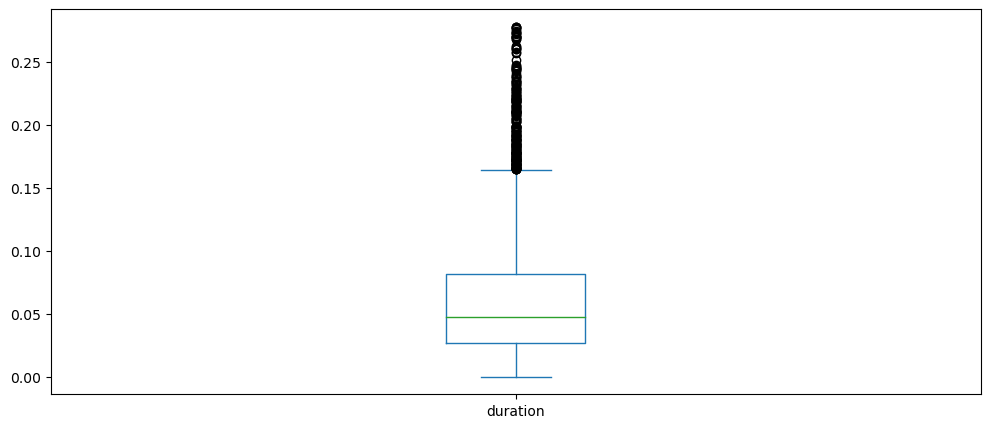

In [95]:
df_norm['duration'].plot(kind = 'box')

In [96]:
df_norm['duration'].describe()

count    3400.000000
mean        0.063005
std         0.051788
min         0.000000
25%         0.026930
50%         0.047266
75%         0.081891
max         0.277549
Name: duration, dtype: float64

In [97]:
a = 0.081891 + (0.081891 - 0.026930) * 1.5
a

0.16433250000000002

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,subscribed?
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.299186,0.506849,0.652968,0.511416,0.178082,0.127854,0.401826,0.470320,0.0,0.616438,0.383562,0.482877,0.205217,0.039484,0.0,0.082192,0.787005,0.567941,0.415907,0.832048,0.757261,0.100457,0.625571,0.273973,0.415525
std,0.129977,0.413309,0.317860,0.501015,0.383458,0.334692,0.491390,0.500262,0.0,0.487367,0.487367,0.341162,0.031938,0.051227,0.0,0.275286,0.291018,0.207555,0.164911,0.217050,0.346020,0.301297,0.485084,0.447017,0.493941
min,0.028986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.164880,0.000000,0.0,0.000000,0.000000,0.000000,0.033473,0.105860,0.002041,0.000000,0.000000,0.000000,0.000000
25%,0.188406,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.177796,0.000000,0.0,0.000000,0.687500,0.389322,0.338912,0.859735,0.767800,0.000000,0.000000,0.000000,0.000000
50%,0.289855,0.500000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.500000,0.198131,0.029412,0.0,0.000000,0.937500,0.669135,0.376569,0.877883,0.957596,0.000000,1.000000,0.000000,0.000000
75%,0.391304,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.750000,0.225337,0.058824,0.0,0.000000,1.000000,0.698753,0.602510,1.000000,0.981066,0.000000,1.000000,1.000000,1.000000
max,0.579710,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.277549,0.264706,0.0,1.000000,1.000000,0.882307,0.866109,1.000000,0.982993,1.000000,1.000000,1.000000,1.000000


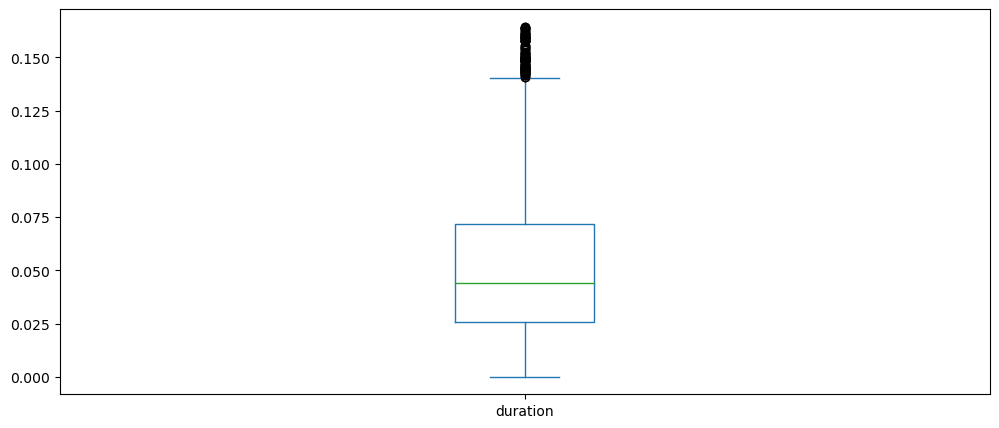

In [98]:
p = df_norm[df_norm['duration'] < a]
p['duration'].plot(kind = 'box')
df_norm.query('duration > 0.1643332').describe()

<AxesSubplot:>

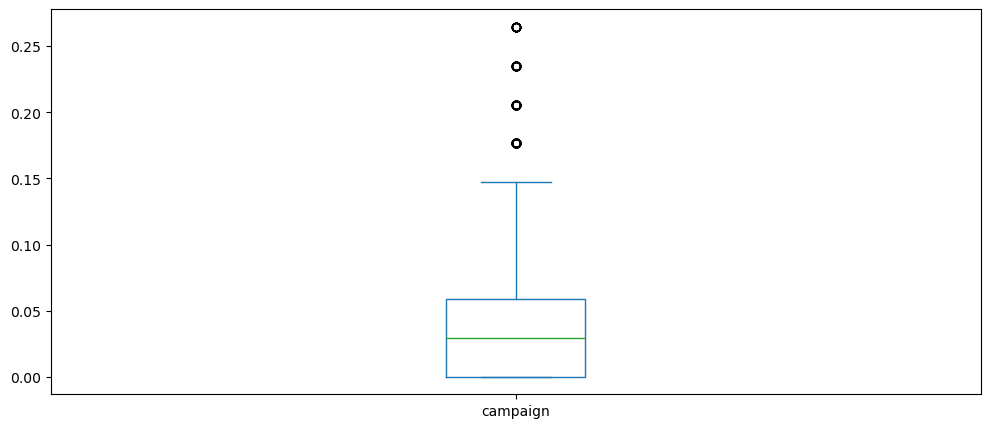

In [99]:
df_norm['campaign'].plot(kind = 'box')

In [100]:
df_norm['campaign'].describe()

count    3400.000000
mean        0.038123
std         0.050747
min         0.000000
25%         0.000000
50%         0.029412
75%         0.058824
max         0.264706
Name: campaign, dtype: float64

In [101]:
b = 0.059 + (0.059 - 0) * 1.5
b

0.1475

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,subscribed?
23,0.362319,0.5,0.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00,0.105523,0.176471,0.0,0.0,0.9375,0.698753,0.602510,0.859735,0.958957,0.0,1.0,0.0,0.0
32,0.420290,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.010442,0.176471,0.0,0.0,1.0000,0.484412,0.615063,1.000000,0.981179,0.0,1.0,0.0,0.0
75,0.579710,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.024457,0.176471,0.0,0.0,1.0000,0.484412,0.615063,1.000000,0.981406,0.0,1.0,0.0,0.0
154,0.391304,1.0,0.6,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.039571,0.264706,0.0,0.0,1.0000,0.882307,0.376569,1.000000,0.958957,0.0,1.0,0.0,0.0
159,0.405797,0.5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.093707,0.176471,0.0,0.0,1.0000,0.484412,0.615063,1.000000,0.981633,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,0.275362,0.5,0.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.000824,0.205882,0.0,0.0,1.0000,0.484412,0.615063,1.000000,0.981179,1.0,0.0,0.0,0.0
3713,0.376812,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.25,0.143996,0.176471,0.0,0.0,1.0000,0.484412,0.615063,1.000000,0.981406,0.0,1.0,0.0,0.0
3725,0.362319,1.0,0.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.024457,0.205882,0.0,0.0,1.0000,0.484412,0.615063,1.000000,0.981406,0.0,1.0,0.0,0.0
3758,0.173913,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.027480,0.176471,0.0,0.0,1.0000,0.669135,0.338912,1.000000,0.981406,1.0,0.0,0.0,0.0


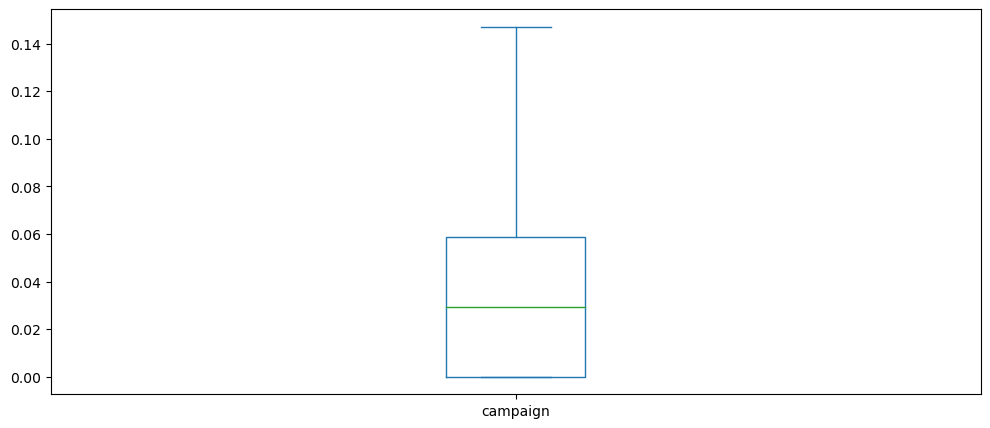

In [102]:
g = df_norm[df_norm['campaign'] < b]
g['campaign'].plot(kind = 'box')
df_norm.query('campaign > 0.1475')

Kako atributi Duratio i Campaign imaju veliki broj vrednosti koji su na Boxplotu prikazani kao outlajeri, nismo ih izbacili.

## 9) Kreirajte klaster model i odredite klastere svake instance 

In [103]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3813
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3400 non-null   float64
 1   job             3400 non-null   float64
 2   education       3400 non-null   float64
 3   housing         3400 non-null   float64
 4   loan            3400 non-null   float64
 5   winter          3400 non-null   float64
 6   spring          3400 non-null   float64
 7   summer          3400 non-null   float64
 8   autumn          3400 non-null   float64
 9   cellular        3400 non-null   float64
 10  telephone       3400 non-null   float64
 11  anxiety         3400 non-null   float64
 12  duration        3400 non-null   float64
 13  campaign        3400 non-null   float64
 14  pdays           3400 non-null   float64
 15  previous        3400 non-null   float64
 16  emp_var_rate    3400 non-null   float64
 17  cons_price_idx  3400 non-null   f

In [104]:
df_norm.isna().sum() # postoji jedna na vrednost zbog koje ne radi klaster algoritam

age               0
job               0
education         0
housing           0
loan              0
winter            0
spring            0
summer            0
autumn            0
cellular          0
telephone         0
anxiety           0
duration          0
campaign          0
pdays             0
previous          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
nr_employed       0
euribor3m         0
divorced          0
married           0
single            0
subscribed?       0
dtype: int64

In [105]:
df_norm = df_norm.fillna(0) # menjamo na sa 0
df_norm.isna().sum()

age               0
job               0
education         0
housing           0
loan              0
winter            0
spring            0
summer            0
autumn            0
cellular          0
telephone         0
anxiety           0
duration          0
campaign          0
pdays             0
previous          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
nr_employed       0
euribor3m         0
divorced          0
married           0
single            0
subscribed?       0
dtype: int64

In [106]:
df_norm_clustering=df_norm.drop('subscribed?', axis=1)

In [107]:
kmeans_algorithm = KMeans(n_clusters = 3, max_iter = 100) # Podrazumevani način inicijalizacije je K-means++ 
cluster_model = kmeans_algorithm.fit(df_norm_clustering) # fitovanje modela
centers = cluster_model.cluster_centers_ # dobijeni centroidi
print(centers)

[[ 3.00554099e-01  4.75227085e-01  5.81998348e-01  4.92155244e-01
   1.70933113e-01  3.22047894e-02  5.71428571e-01  3.96366639e-01
   0.00000000e+00 -1.66533454e-15  1.00000000e+00  4.88852188e-01
   6.16071044e-02  4.29154321e-02  0.00000000e+00  4.95458299e-03
   9.15924323e-01  7.21221875e-01  4.98122165e-01  8.87738890e-01
   9.12443385e-01  1.13129645e-01  6.64739884e-01  2.22130471e-01]
 [ 3.02441159e-01  5.80877067e-01  6.90438533e-01  5.70093458e-01
   1.69662114e-01  2.34363767e-01 -8.88178420e-16  7.65636233e-01
   0.00000000e+00  1.00000000e+00  1.11022302e-15  4.92451474e-01
   6.31206056e-02  3.82289508e-02  0.00000000e+00  5.17613228e-02
   8.65846649e-01  5.13364112e-01  4.54051599e-01  9.26544801e-01
   8.73106511e-01  1.09273904e-01  6.05319914e-01  2.85406183e-01]
 [ 2.83607570e-01  4.93734336e-01  6.23558897e-01  5.87719298e-01
   1.62907268e-01  4.76190476e-02  9.06015038e-01  4.63659148e-02
   0.00000000e+00  9.74937343e-01  2.50626566e-02  4.91228070e-01
   6.492

In [108]:
pd.DataFrame(centers, columns = df_norm_clustering.columns)

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single
0,0.300554,0.475227,0.581998,0.492155,0.170933,0.032205,5.714286e-01,0.396367,0.0,-1.665335e-15,1.000000e+00,0.488852,0.061607,0.042915,0.0,0.004955,0.915924,0.721222,0.498122,0.887739,0.912443,0.113130,0.664740,0.222130
1,0.302441,0.580877,0.690439,0.570093,0.169662,0.234364,-8.881784e-16,0.765636,0.0,1.000000e+00,1.110223e-15,0.492451,0.063121,0.038229,0.0,0.051761,0.865847,0.513364,0.454052,0.926545,0.873107,0.109274,0.605320,0.285406
2,0.283608,0.493734,0.623559,0.587719,0.162907,0.047619,9.060150e-01,0.046366,0.0,9.749373e-01,2.506266e-02,0.491228,0.064927,0.030665,0.0,0.358396,0.322107,0.310496,0.226539,0.472487,0.144173,0.105263,0.566416,0.328321


In [109]:
clusters = cluster_model.predict(df_norm_clustering) # predict vraća labele klastera
df_norm_clustering['cluster'] = clusters # dodavanje labela u inicijalni DataFrame
df_norm_clustering.head(10)

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,cluster
0,0.159420,0.0,0.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.132729,0.029412,0.0,0.0,0.333333,0.269680,0.192469,0.512287,0.153741,0.0,1.0,0.0,2
1,0.289855,0.5,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00,0.093982,0.088235,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,0.0,0.0,1.0,0
2,0.086957,0.5,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.061281,0.000000,0.0,0.0,1.000000,0.882307,0.376569,1.000000,0.981179,0.0,1.0,0.0,0
3,0.405797,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.014839,0.000000,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,1.0,0.0,1
6,0.318841,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.010992,0.029412,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,1.0,0.0,1
7,0.173913,0.5,0.8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.017587,0.000000,0.0,1.0,0.687500,0.389322,0.368201,0.877883,0.797732,1.0,0.0,0.0,1
8,0.231884,0.0,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.75,0.069518,0.000000,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,0.0,1.0,0.0,0
9,0.086957,0.5,0.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.081616,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980272,0.0,0.0,1.0,1
10,0.246377,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.039571,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.982540,0.0,0.0,1.0,1
11,0.246377,1.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.50,0.025556,0.029412,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.957823,0.0,1.0,0.0,0


In [110]:
att_names = df_norm_clustering.columns
att_names

Index(['age', 'job', 'education', 'housing', 'loan', 'winter', 'spring',
       'summer', 'autumn', 'cellular', 'telephone', 'anxiety', 'duration',
       'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'nr_employed', 'euribor3m', 'divorced', 'married',
       'single', 'cluster'],
      dtype='object')

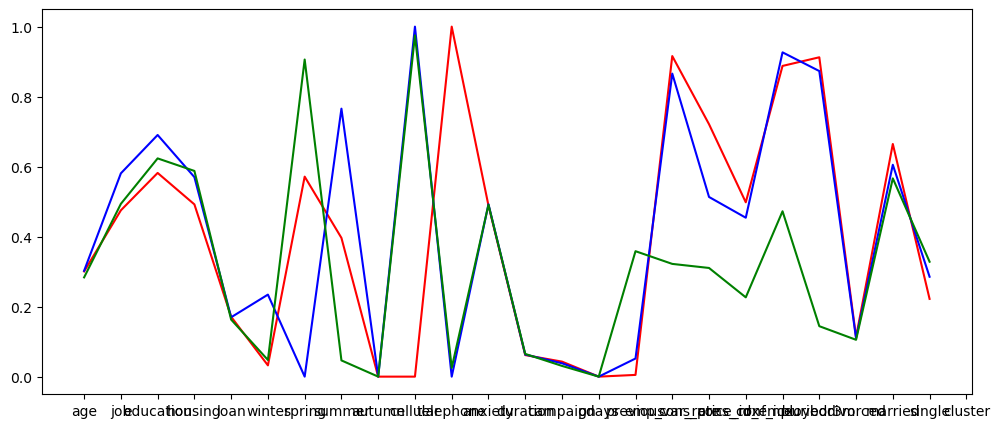

In [112]:
plt.close()
plt.rcParams['figure.figsize']=[12,5]
plt.plot(centers[0,:], c = 'r')
plt.plot(centers[1,:], c = 'b')
plt.plot(centers[2,:], c = 'g')
plt.xticks(list(range(25)), att_names)
plt.show()
#svaka linija predstavlja predstavnika centroida jednog klastera, odnosno njegove vrednosti za svaki atribut

In [113]:
 # Kreiranje modela za broj klastera k = 1..10
df_norm_clustering = df_norm_clustering.drop('cluster', axis = 1)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_norm_clustering)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_

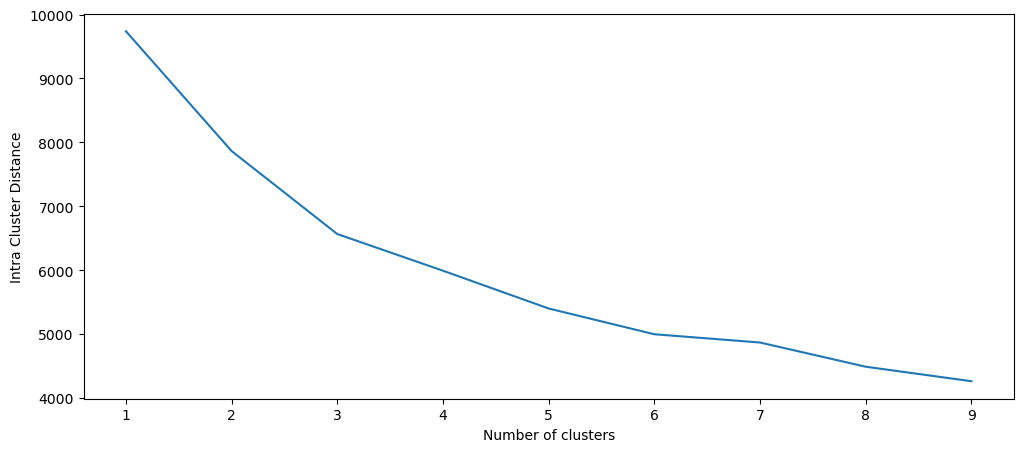

In [114]:
#Elbow kriva
plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

In [115]:
!pip install scikit-plot


Defaulting to user installation because normal site-packages is not writeable


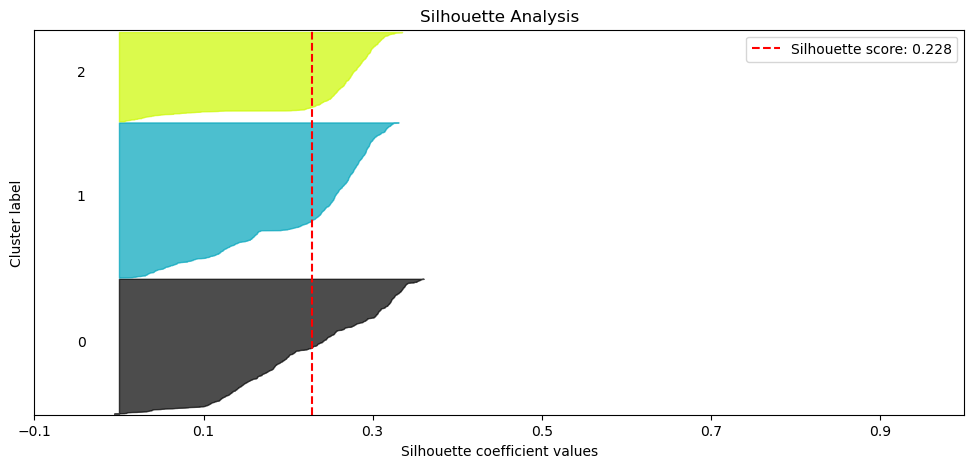

In [118]:
import scikitplot as skplt
cluster_labels = KMeans(n_clusters=3, max_iter=100).fit_predict(df_norm_clustering)
skplt.metrics.plot_silhouette(df_norm_clustering, cluster_labels)
plt.show()

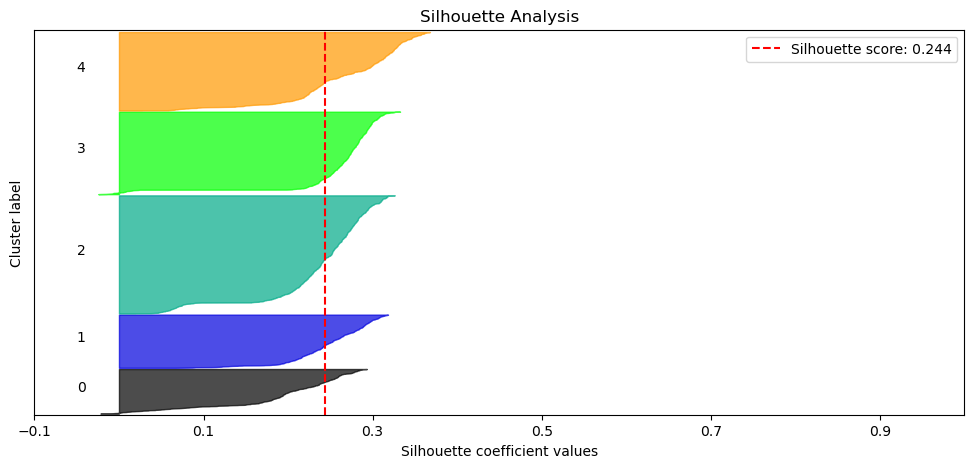

In [119]:
cluster_labels = KMeans(n_clusters=5, max_iter=100).fit_predict(df_norm_clustering)
skplt.metrics.plot_silhouette(df_norm_clustering, cluster_labels)
plt.show()

Pošto smo uvideli da nam klasteri imaju jako loše siluet skorove, odlučili smo da analiziramo i pronađemo neke atribute koji nam ne daju mnogo informacija i uklonimo ih iz analize. Pre svega ćemo uzeti slučajeve sa 3 i 5 klastera jer su se oni pokazali kao najbolji.

In [123]:
kmeans_algorithm = KMeans(n_clusters = 5, max_iter = 100) # Podrazumevani način inicijalizacije je K-means++ 
cluster_model = kmeans_algorithm.fit(df_norm_clustering) # fitovanje modela
centers = cluster_model.cluster_centers_ # dobijeni centroidi

In [124]:
clusters = cluster_model.predict(df_norm_clustering) # predict vraća labele klastera
df_norm_clustering['cluster'] = clusters # dodavanje labela u inicijalni DataFrame
df_norm_clustering.head(10)

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,cluster
0,0.159420,0.0,0.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00,0.132729,0.029412,0.0,0.0,0.333333,0.269680,0.192469,0.512287,0.153741,0.0,1.0,0.0,0
1,0.289855,0.5,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00,0.093982,0.088235,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,0.0,0.0,1.0,3
2,0.086957,0.5,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.50,0.061281,0.000000,0.0,0.0,1.000000,0.882307,0.376569,1.000000,0.981179,0.0,1.0,0.0,2
3,0.405797,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.014839,0.000000,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,1.0,0.0,4
6,0.318841,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.010992,0.029412,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,1.0,0.0,4
7,0.173913,0.5,0.8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.017587,0.000000,0.0,1.0,0.687500,0.389322,0.368201,0.877883,0.797732,1.0,0.0,0.0,4
8,0.231884,0.0,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.75,0.069518,0.000000,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,0.0,1.0,0.0,3
9,0.086957,0.5,0.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.081616,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980272,0.0,0.0,1.0,1
10,0.246377,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.039571,0.000000,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.982540,0.0,0.0,1.0,1
11,0.246377,1.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.50,0.025556,0.029412,0.0,0.0,0.937500,0.698753,0.602510,0.859735,0.957823,0.0,1.0,0.0,3


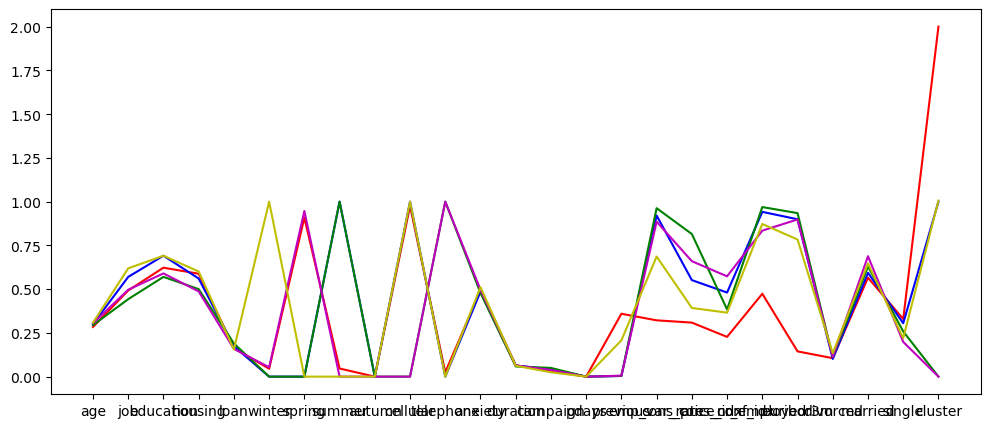

In [125]:
plt.close()
plt.rcParams['figure.figsize']=[12,5]
plt.plot(centers[0,:], c = 'r')
plt.plot(centers[1,:], c = 'b')
plt.plot(centers[2,:], c = 'g')
plt.plot(centers[3,:], c = 'm')
plt.plot(centers[4,:], c = 'y')
plt.xticks(list(range(25)), att_names)
plt.show()

Nakon analize kolona, utvridli smo da nekolicina njih nam ne daje puno informacija, pa ćemo samim tim da ih izdvojimo i probamo bez njih da odradimo kalsterovanje.

In [126]:
df_norm_clustering=df_norm_clustering.drop(['age', 'autumn', 'loan', 'duration', 'campaign', 'pdays', 'married', 'divorced', 'anxiety'], axis=1)

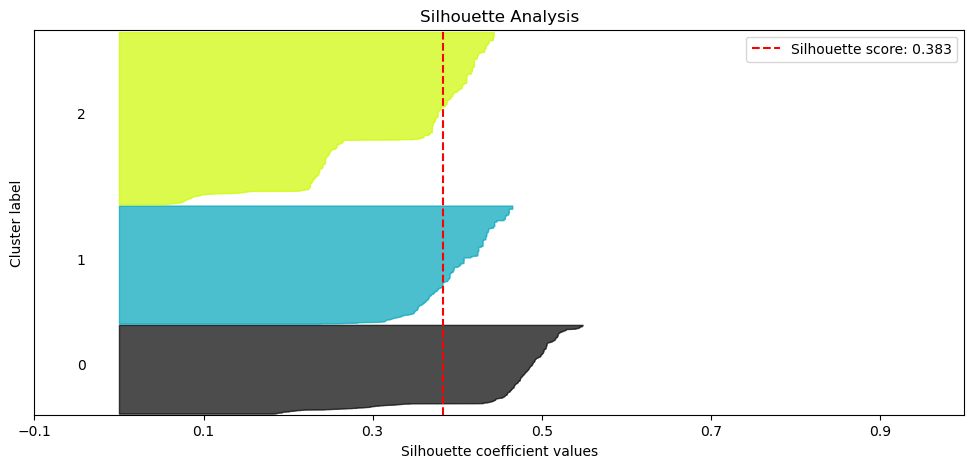

In [127]:
cluster_labels = KMeans(n_clusters=3, max_iter=100).fit_predict(df_norm_clustering)
skplt.metrics.plot_silhouette(df_norm_clustering, cluster_labels)
plt.show()

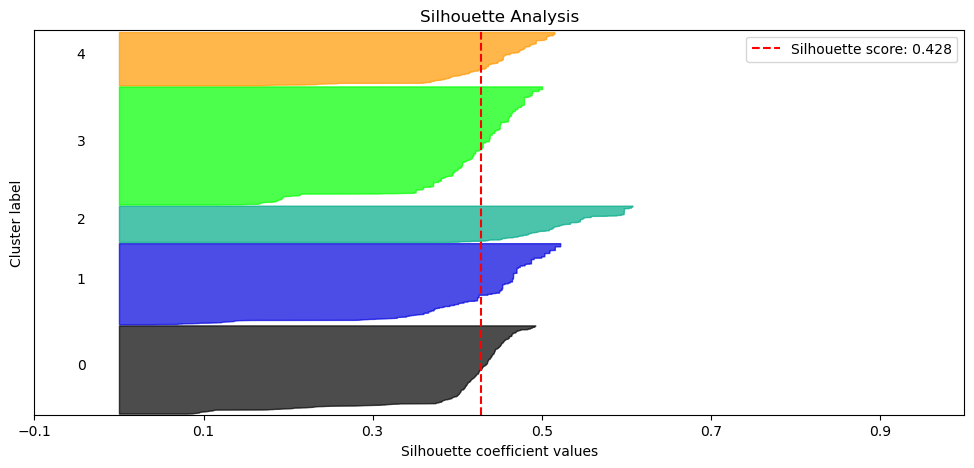

In [132]:
cluster_labels = KMeans(n_clusters=5, max_iter=100).fit_predict(df_norm_clustering)
skplt.metrics.plot_silhouette(df_norm_clustering, cluster_labels)
plt.show()

Sada smo dobili mnogo bolje rezultate siluet skora u odnosu na prethodne, i ovde možemo da zaključimo da je dobar broj klastera 5. Ukoliko želimo da definišemo svaki klaster, odlučili smo se za ovakvu podelu.
* Prvi klaster su ljudi koji su visoko obrazovani i uglavnom rade na visokim pozicijama
* Drugi klaster su prosečni građani
* Treći klaster su stariji, zapušteni ljudi
* Četvrti klaster su preduzetnici ili frilenseri
* Peti klaster su mladi ljudi, studenti

# BONUS zadatak

In [134]:
df_norm_clustering['subscribed?']=df_norm['subscribed?']

In [135]:
df_norm_clustering.head(10)

,job,education,housing,winter,spring,summer,cellular,telephone,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,single,cluster,subscribed?
0,0.0,0.4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.333333,0.269680,0.192469,0.512287,0.153741,0.0,0,0.0
1,0.5,0.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,1.0,3,0.0
2,0.5,0.6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.882307,0.376569,1.000000,0.981179,0.0,2,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,4,0.0
6,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.687500,0.389322,0.368201,0.877883,0.806349,0.0,4,0.0
7,0.5,0.8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.687500,0.389322,0.368201,0.877883,0.797732,0.0,4,0.0
8,0.0,0.4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.937500,0.698753,0.602510,0.859735,0.956916,0.0,3,0.0
9,0.5,0.2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.980272,1.0,1,0.0
10,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.669135,0.338912,1.000000,0.982540,1.0,1,0.0
11,1.0,0.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.937500,0.698753,0.602510,0.859735,0.957823,0.0,3,0.0


Bez podele skupa

In [137]:
X=df_norm_clustering.drop('subscribed?', axis=1)

In [138]:
y=df_norm_clustering['subscribed?']

In [139]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [147]:
from sklearn.model_selection import cross_validate 
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [145]:
def print_cv_performance(result):
    print(f"Accuracy: {round(np.mean(result['test_accuracy'])*100, 2)}% +/- {round(np.std(result['test_accuracy'])*100, 2)}%")
    print(f"Precision: {round(np.mean(result['test_precision'])*100, 2)}% +/- {round(np.std(result['test_precision'])*100, 2)}%")
    print(f"Recall: {round(np.mean(result['test_recall'])*100, 2)}% +/- {round(np.std(result['test_recall'])*100, 2)}%")
    print(f"F1: {round(np.mean(result['test_f1'])*100, 2)}% +/- {round(np.std(result['test_f1'])*100, 2)}%")

In [148]:
print_cv_performance(result)

Accuracy: 92.35% +/- 0.57%
Precision: 27.27% +/- 15.37%
Recall: 5.96% +/- 3.36%
F1: 9.57% +/- 5.3%


In [149]:
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
model=KNeighborsClassifier()
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [150]:
print_cv_performance(result)

Accuracy: 92.35% +/- 0.57%
Precision: 27.27% +/- 15.37%
Recall: 5.96% +/- 3.36%
F1: 9.57% +/- 5.3%


Sa podelom skupa

In [154]:
c0=df_norm_clustering.query('cluster == 0')
c1=df_norm_clustering.query('cluster == 1')
c2=df_norm_clustering.query('cluster == 2')
c3=df_norm_clustering.query('cluster == 3')
c4=df_norm_clustering.query('cluster == 4')

In [180]:
c0.shape

(796, 17)

In [181]:
c1.shape

(1065, 17)

In [182]:
c2.shape

(480, 17)

In [183]:
c3.shape

(731, 17)

In [185]:
c4.shape

(328, 17)

In [187]:
X=c0.drop('subscribed?', axis=1)
y=c0['subscribed?']

In [188]:
model = LogisticRegression(max_iter=1000)
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 87.44% +/- 1.36%
Precision: 26.67% +/- 38.87%
Recall: 4.22% +/- 5.18%
F1: 7.08% +/- 8.79%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [189]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.8743718592964824
Precision: 0.36363636363636365
Recall: 0.041237113402061855
F1: 0.07407407407407407


In [190]:
model=KNeighborsClassifier()
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 85.69% +/- 1.9%
Precision: 12.83% +/- 17.29%
Recall: 4.22% +/- 5.18%
F1: 6.23% +/- 7.71%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.8957286432160804
Precision: 0.75
Recall: 0.21649484536082475
F1: 0.336


In [192]:
X=c1.drop('subscribed?', axis=1)
y=c1['subscribed?']

In [193]:
model = LogisticRegression(max_iter=1000)
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 91.93% +/- 0.6%
Precision: 20.0% +/- 33.17%
Recall: 3.47% +/- 5.32%
F1: 5.82% +/- 8.9%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [194]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.923943661971831
Precision: 0.75
Recall: 0.07058823529411765
F1: 0.12903225806451613


In [195]:
model=KNeighborsClassifier()
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 91.46% +/- 1.89%
Precision: 40.5% +/- 38.09%
Recall: 12.78% +/- 12.85%
F1: 18.39% +/- 17.4%


In [196]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.9305164319248826
Precision: 0.6896551724137931
Recall: 0.23529411764705882
F1: 0.3508771929824561


In [197]:
X=c2.drop('subscribed?', axis=1)
y=c2['subscribed?']

In [198]:
model = LogisticRegression(max_iter=1000)
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 95.62% +/- 0.63%
Precision: 0.0% +/- 0.0%
Recall: 0.0% +/- 0.0%
F1: 0.0% +/- 0.0%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [199]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.95625
Precision: 0.0
Recall: 0.0
F1: 0.0


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
model=KNeighborsClassifier()
result=cross_validate(model, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 95.62% +/- 0.42%
Precision: 0.0% +/- 0.0%
Recall: 0.0% +/- 0.0%
F1: 0.0% +/- 0.0%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [201]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.95625
Precision: 0.0
Recall: 0.0
F1: 0.0


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
X=c3.drop('subscribed?', axis=1)
y=c3['subscribed?']

In [203]:
model = LogisticRegression(max_iter=1000)
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 97.26% +/- 0.01%
Precision: 0.0% +/- 0.0%
Recall: 0.0% +/- 0.0%
F1: 0.0% +/- 0.0%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [205]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.9726402188782489
Precision: 0.0
Recall: 0.0
F1: 0.0


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
model=KNeighborsClassifier()
result=cross_validate(model, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 97.26% +/- 0.01%
Precision: 0.0% +/- 0.0%
Recall: 0.0% +/- 0.0%
F1: 0.0% +/- 0.0%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [206]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.9726402188782489
Precision: 0.0
Recall: 0.0
F1: 0.0


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
X=c4.drop('subscribed?', axis=1)
y=c4['subscribed?']

In [208]:
model = LogisticRegression(max_iter=1000)
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 96.34% +/- 1.2%
Precision: 0.0% +/- 0.0%
Recall: 0.0% +/- 0.0%
F1: 0.0% +/- 0.0%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [209]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.9634146341463414
Precision: 0.0
Recall: 0.0
F1: 0.0


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
model=KNeighborsClassifier()
result=cross_validate(model, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print_cv_performance(result)

Accuracy: 96.34% +/- 0.73%
Precision: 0.0% +/- 0.0%
Recall: 0.0% +/- 0.0%
F1: 0.0% +/- 0.0%


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [211]:
model.fit(X, y)
print_performance(y, model.predict(X))

Accuracy: 0.9634146341463414
Precision: 0.0
Recall: 0.0
F1: 0.0


D:\Programi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
